## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [68]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis

> "Visualization gives you answers to questions you didn’t know you had." ~ Ben Schneiderman
>

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is car_price.csv.


In [70]:
# Load the dataset
car_price_df = pd.read_csv('car_price.csv')

<b> 1.1 Plot the distribution of the following features as a small multiple of histograms. </b>
1. carlength 
2. carwidth
3. stroke 
4. curbweight

<b></b>

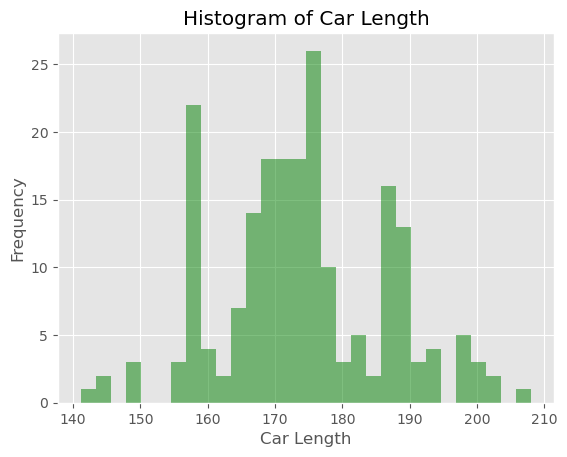

In [72]:
### Code here
car_length = car_price_df['carlength']
car_width = car_price_df['carwidth']
stroke_ = car_price_df['stroke']
curb_weight = car_price_df['curbweight']
plt.style.use('ggplot')
plt.hist(car_length, bins=30, alpha=0.5, color='green')
plt.xlabel('Car Length')
plt.ylabel('Frequency')
plt.title('Histogram of Car Length')
plt.show()

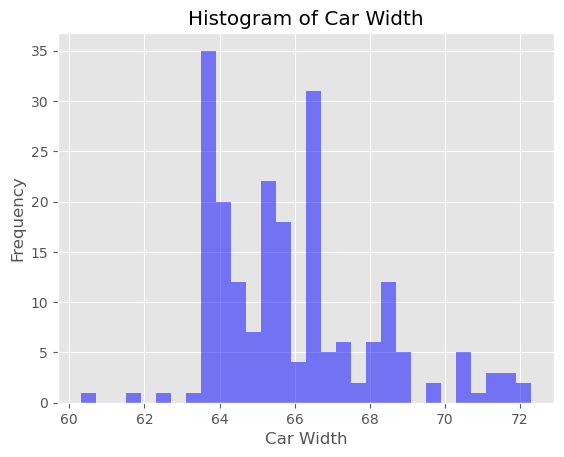

In [73]:
plt.hist(car_width, bins=30, alpha=0.5, color='blue')
plt.xlabel('Car Width')
plt.ylabel('Frequency')
plt.title('Histogram of Car Width')
plt.show()

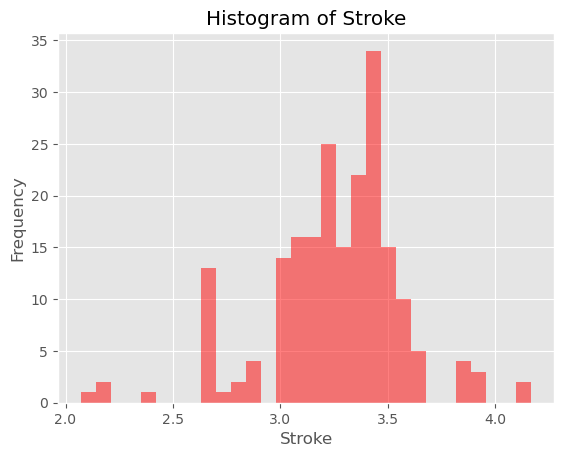

In [74]:
plt.hist(stroke_, bins=30, alpha=0.5, color='red')
plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.title('Histogram of Stroke')
plt.show()

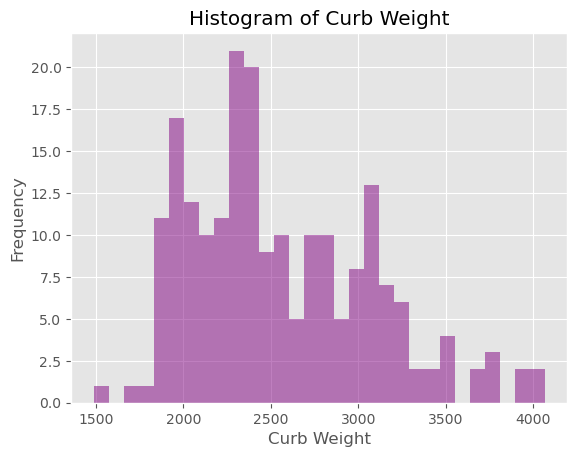

In [75]:
plt.hist(curb_weight, bins=30, alpha=0.5, color='purple')
plt.xlabel('Curb Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Curb Weight')
plt.show()

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables </b>
1. fueltype 
2. drivewheel
3. enginelocation


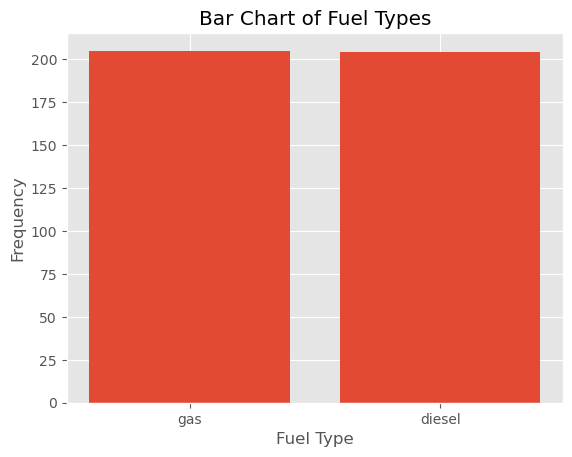

In [76]:
### Code here
fuel_type = car_price_df['fueltype']
drive_wheel = car_price_df['drivewheel']
engine_location = car_price_df['enginelocation']
values = [1] * len(fuel_type)
car_id = car_price_df['car_ID']
plt.bar(fuel_type, car_id)
plt.title("Bar Chart of Fuel Types")
plt.xlabel("Fuel Type")
plt.ylabel("Frequency")
plt.show()

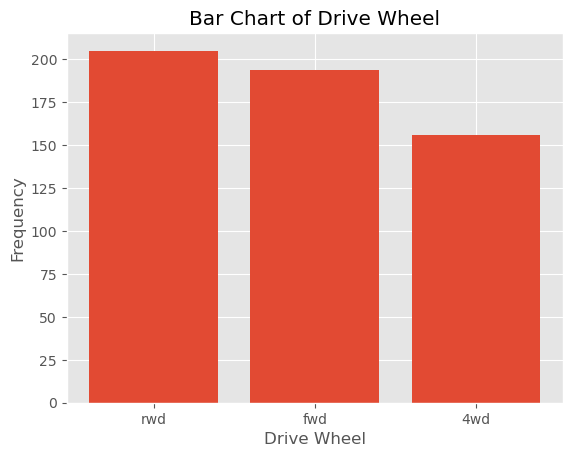

In [77]:
plt.bar(drive_wheel, car_id)
plt.title("Bar Chart of Drive Wheel")
plt.xlabel("Drive Wheel")
plt.ylabel("Frequency")
plt.show()

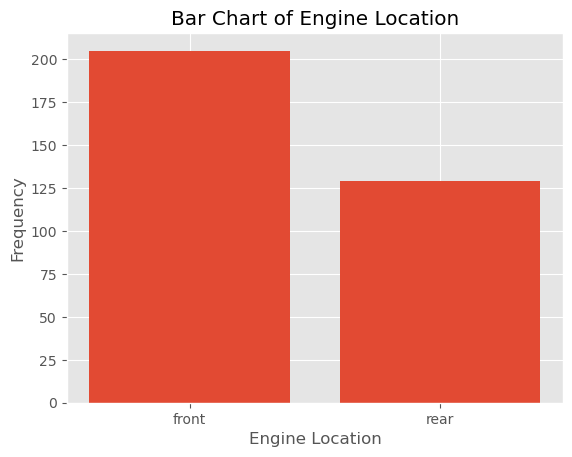

In [78]:
plt.bar(engine_location, car_id)
plt.title("Bar Chart of Engine Location")
plt.xlabel("Engine Location")
plt.ylabel("Frequency")
plt.show()

<b> 1.3 Plot relationships between the following features and the target variable <em>price</em> as a small multiple of boxplots. </b>
1. cylindernumber 
2. enginetype

<b> Note: Make sure to order the x-axis labels in increasing order for cylindernumber. </b>

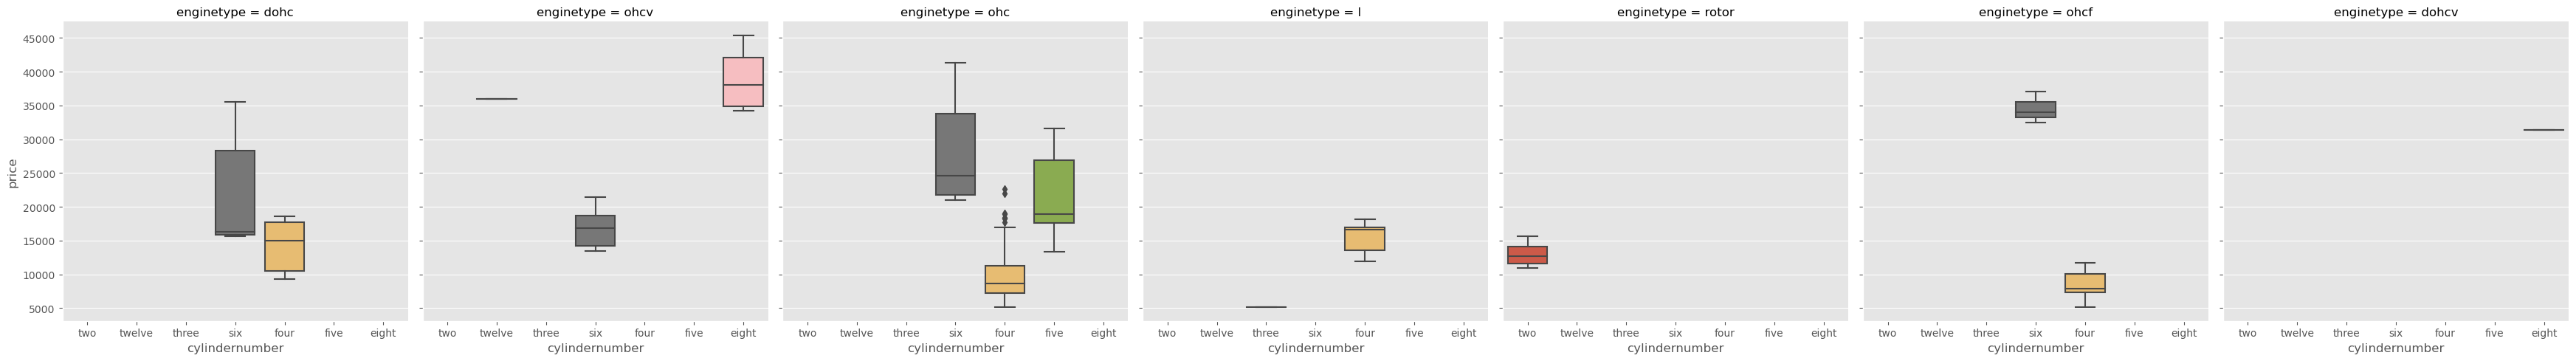

In [79]:
### Code here
cyl_order = car_price_df['cylindernumber'].sort_values(ascending=False).unique()
sns.catplot(x='cylindernumber', y='price', col='enginetype', kind='box', data=car_price_df, order=cyl_order)
plt.xlabel("cylindernumber")
plt.show()

<b> 1.4 What do you infer from the visualization above. Comment on the skewness of the distributions (histograms), class imbalance (bar charts), and relationship between categories and price of the car (boxplots). </b>

#### Comment here
Except for ohcv and I engine types, the price of the cars appears to decrease as the number of cylinders increases. This observation is somewhat unexpected because, in general, cars with more cylinders tend to be more expensive. However, this trend could be due to some other factors such as the age, make, or model of the cars that were considered in the dataset. We would need more data to confirm the underlying factors that lead to this trend.

Another observation is that there are not enough data points for some engine types, such as rotor, I, and dohcv, to visualize the distribution of their prices adequately. This is because the boxplots for these engine types have fewer data points, making it difficult to infer any meaningful insights into their skewedness.

We also observe an imbalance in the data. For example, there are fewer cars with engines located at the rear compared to those with engines located at the front. This could affect the conclusions we draw from the data, and we need to be careful in our analysis and interpretation.

Finally, we notice that the histograms show a little bit of imbalance in the data, as there are surging peaks in the middle of the graph time to time. This observation indicates that the data may not be uniformly distributed, and there might be some underlying factors that contribute to this pattern.

------------------------------------------------------------------------------------------------------------------

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression
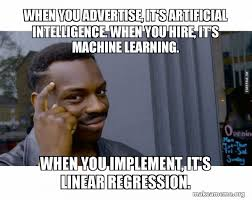



In part 1, we will use two datasets - synthetic and Car Price to train and evaluate our linear regression model.

### Synthetic Data

<b>2.1.1 Generate 100 samples of synthetic data using the following equations. </b>

$ \epsilon ∼ \mathcal{N}(0,4) $

$ y = 7x - 8 + \epsilon $

You may use [np.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for generating $\epsilon$. 

In [80]:
np.random.seed(0)
X = np.linspace(0, 15, 100)
epsilon = np.random.normal(0,4,100)
y = 7*X-8+epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
*   Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.2 Plot y vs X in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?**

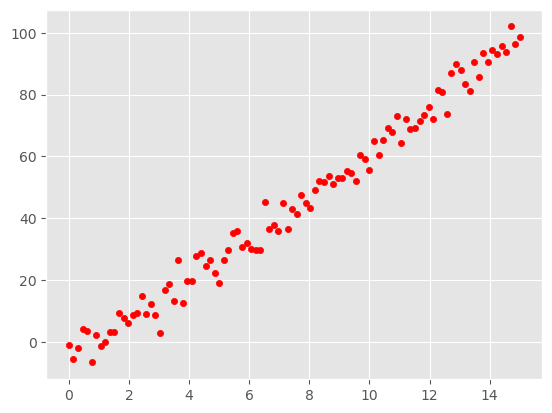

In [81]:
### Code here
plt.scatter(X, y, color='red', s=20, marker='o')
plt.show()

#### Comment here
Yes, the above scatter plot seems to have a positive linear relationship with strong correlation value.

### Car Price Prediction Dataset

The objective of this dataset is to predict the price of a car based on its characterisitics. We will use linear regression to predict the price using its features. 

In [82]:
# split data into features and labels
car_price_X = car_price_df.drop(columns=['price'])
car_price_y = car_price_df['price']

**2.1.3 Plot the relationships between the label (price) and the continuous features (citympg, highwaympg, enginesize, horsepower) using a small multiple of scatter plots. Make sure to label the axes.**

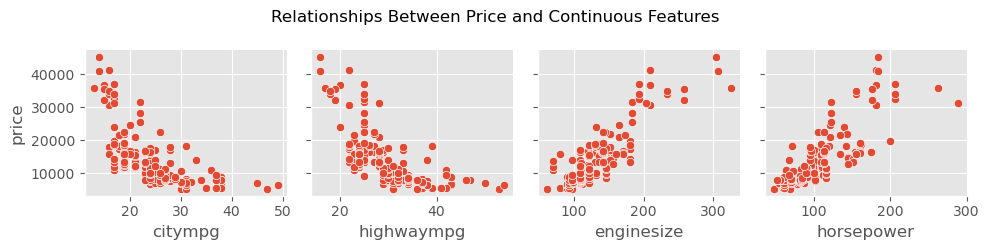

In [84]:
### Code here
sns.pairplot(data=car_price_df, x_vars=['citympg', 'highwaympg', 'enginesize', 'horsepower'], y_vars='price', kind='scatter')

# set the chart title and axis labels
plt.suptitle('Relationships Between Price and Continuous Features', fontsize=12)
plt.ylabel('Price')

# Adjust space and display the plot
plt.tight_layout()
plt.show()

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

#### Comment here
Based on the scatterplot visualization, we can determine whether a linear regression model is appropriate for the relationship between the dependent variable (in this case, the price of a car) and each of the independent variables ("enginesize", "horsepower", "citympg", and "highwaympg").

From the visualization, we see that "enginesize" and "horsepower" have a clear linear relationship with a positive correlation with the target "price". This indicates that as the engine size or horsepower of the car increases, the price also increases at a constant rate. Therefore, a linear regression model would be appropriate to model the relationship between "enginesize" and "horsepower" with "price".

However, for "citympg" and "highwaympg", we see a negative correlation with the target "price". This means that as the miles per gallon (mpg) for city or highway driving increases, the price of the car decreases. In this case, a linear regression model would not work well, since a negative correlation indicates that the relationship is not linear. A different type of model, such as a polynomial regression or a non-linear regression model, may be more appropriate to model the relationship between "citympg" and "highwaympg" with "price".

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:

**Note: Generate the synthetic data before running the next cell to avoid errors.**


In [85]:
X = X.reshape((100, 1))   # Turn the X vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Only one feature vector

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [55.47920661 13.42527931 26.39143796 36.62805794 65.38959977]


**2.1.5 Encode the categorical variables of the CarPrice dataset.**

In [88]:
### Code here
cat_vars = ["CarName", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]
encoded_car_price_df = pd.get_dummies(car_price_df, columns = cat_vars)

**2.1.6 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

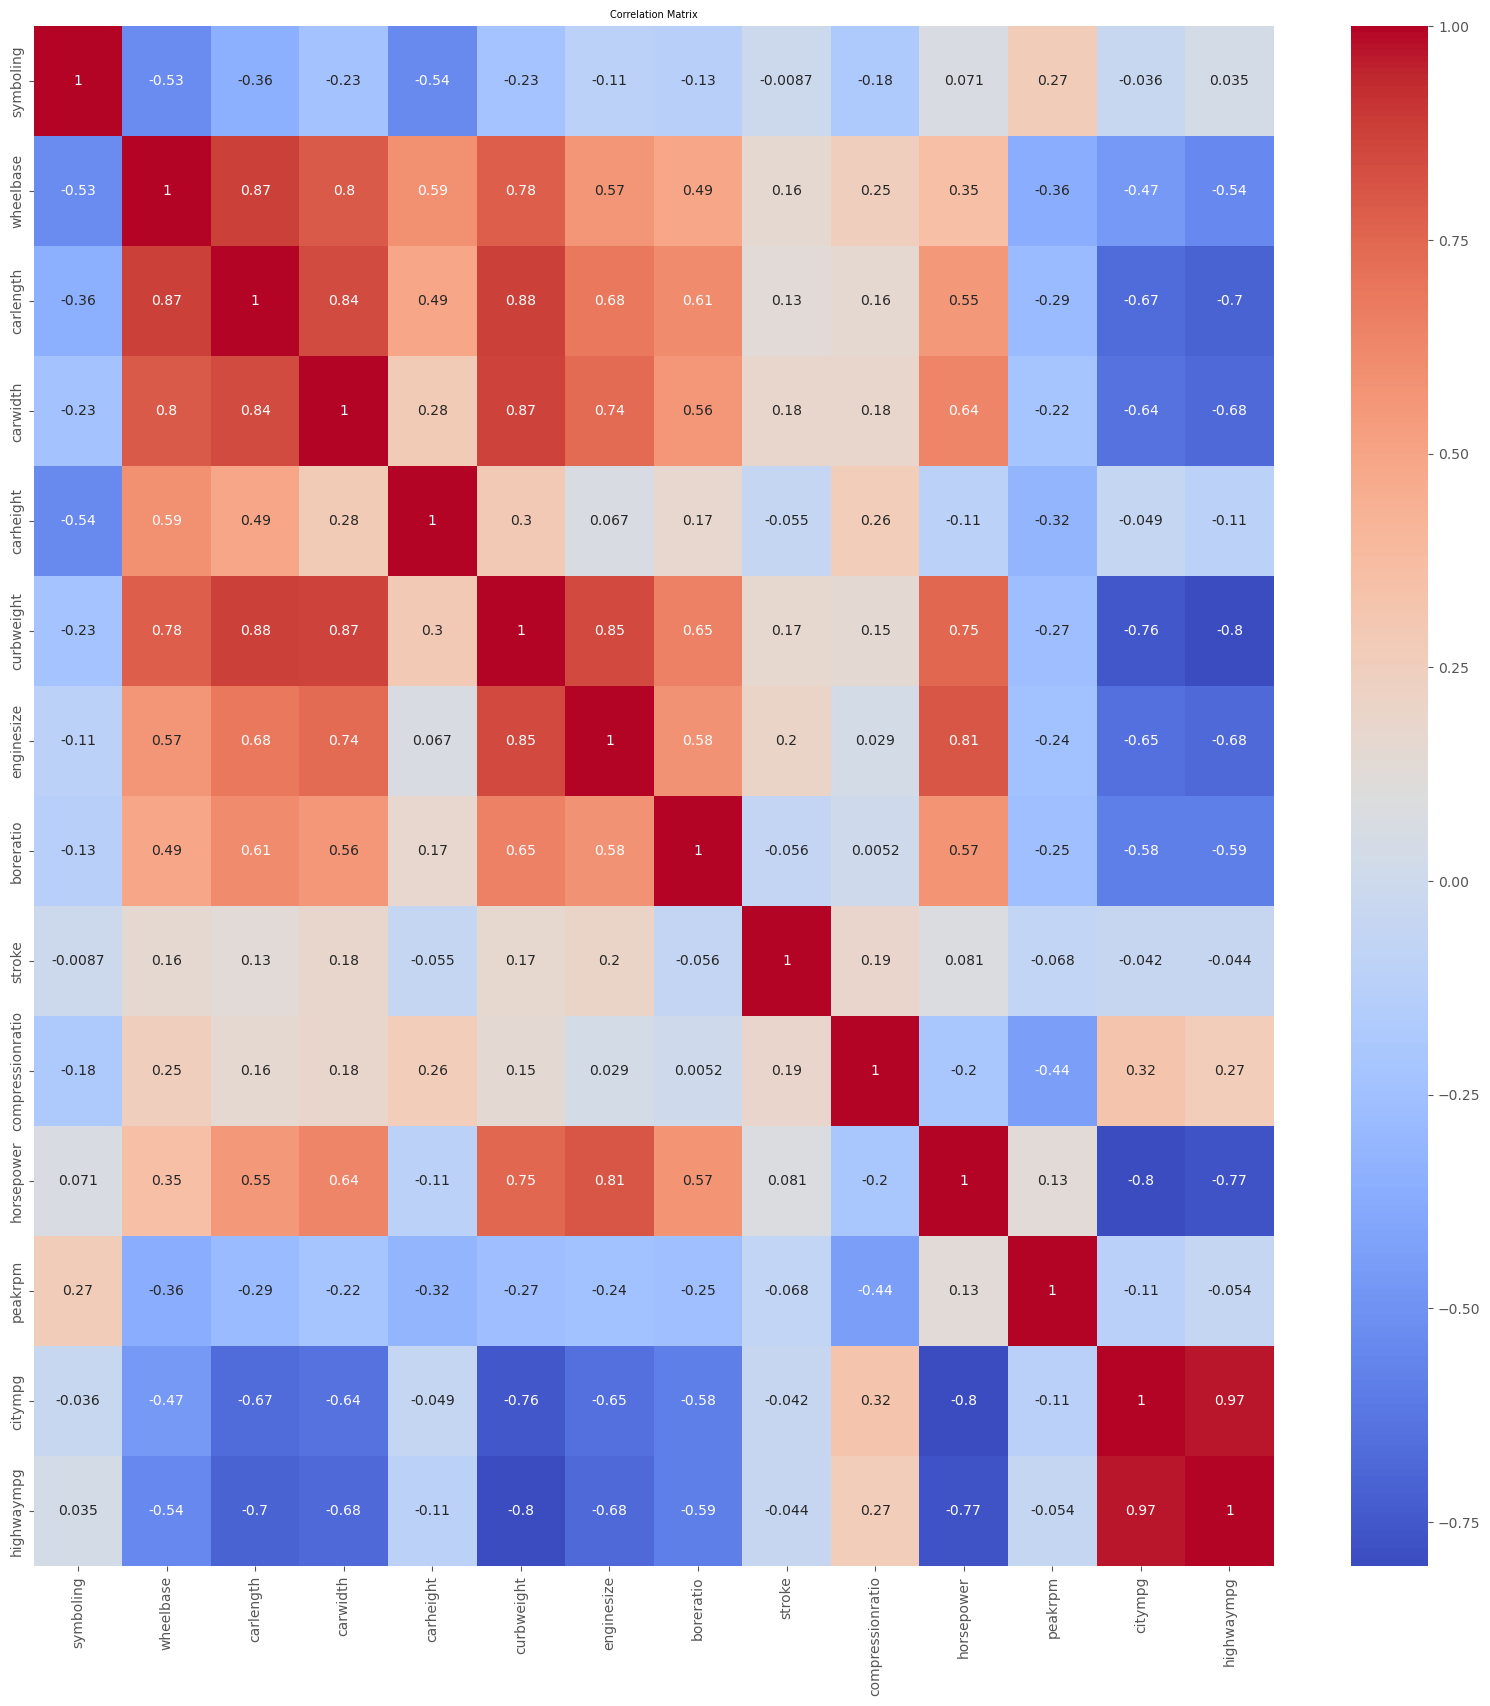

In [108]:
### Code here
num_vars = ["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]
corr_matrix = car_price_df[num_vars].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=7)
plt.show()

#### Comment here
When there is a strong correlation (0.9 or higher) between numerical features, it implies redundancy, and using both of them in the analysis may lead to issues such as overfitting. To prevent these problems, it is suggested to remove one of the highly correlated features. This technique reduces the complexity of the data, enhances the analysis performance by eliminating noise, simplifies the detection of relevant patterns and relationships, and ultimately boosts the accuracy of predictive models while minimizing the risk of overfitting.

**2.1.7 Split the dataset into training (60%), validation (20%), and test (20%) sets. Use random_state = 0.**

In [109]:
num_df = car_price_df[num_vars]
target = car_price_df["price"]

In [110]:
### Code here
lr_X_dev, car_price_X_test, lr_y_dev, car_price_y_test = train_test_split(num_df, target, test_size=0.2, random_state=0)
car_price_X_train, car_price_X_val, car_price_y_train, car_price_y_val = train_test_split(lr_X_dev, lr_y_dev, test_size=0.25, random_state=0)

**2.1.8 Standardize the columns in the feature matrices.**

In [111]:
### Code here
lr_scaler = StandardScaler()
car_price_X_train = lr_scaler.fit_transform(car_price_X_train)
car_price_X_val = lr_scaler.transform(car_price_X_val)
car_price_X_test = lr_scaler.transform(car_price_X_test)

**2.1.9 Add a column of ones to the feature matrices for the bias term.**

In [112]:
### Code here
car_price_X_train = np.hstack([np.ones((car_price_X_train.shape[0], 1)), car_price_X_train])
car_price_X_val = np.hstack([np.ones((car_price_X_val.shape[0], 1)), car_price_X_val])
car_price_X_test = np.hstack([np.ones((car_price_X_test.shape[0], 1)), car_price_X_test])

print(car_price_X_train[:5], '\n\n', car_price_y_train[:5])

[[ 1.          0.17546752 -0.40974726 -0.46851364 -0.00339972 -1.15016334
  -0.55669184 -0.43428753 -0.66854906  1.03549495 -0.30391923 -0.09942571
   0.83916558  0.00909065  0.07554087]
 [ 1.          0.17546752  0.75843946  1.19517538  0.41476539  0.71966069
   0.89378352  0.82259167 -0.08766405 -0.25186264 -0.32695051  0.44932771
  -1.77525606 -0.78958775 -0.80936648]
 [ 1.         -1.48472517  0.89194651  1.17845488  0.55415375  1.43576351
   1.08794163  0.03122329  1.03780065 -0.38389932 -0.67241966  1.52070343
   0.00255066 -1.26879479 -1.25182016]
 [ 1.         -0.65462882 -0.02591448  0.25882779  0.22891423  0.64009371
  -0.33398106 -0.15498104  0.20277846  0.40832074 -0.41907562 -0.51752355
  -0.62491054  0.16882633  0.22302543]
 [ 1.         -0.65462882  1.50941663  1.00288971  1.06524443  0.83901116
   1.03654684  0.12432545  1.00149534 -0.18584431 -0.78757605  0.99808113
   1.04831931 -1.10905911 -0.95685104]] 

 42     10345.0
14     24565.0
199    18950.0
60      8495.0
1

At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Car Price Prediction dataset: car_price_X_train, car_price_X_val, car_price_X_test, car_price_y_train, car_price_y_val, car_price_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.10 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [113]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        dimension = X.shape[1]
        i_val = np.identity(dimension)
        self.w = np.linalg.inv(X.T.dot(X)+self.alpha*i_val).dot(X.T).dot(y)
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = X.dot(self.w)
        return y_pred
        

### Train, Evaluate, and Interpret LR Model

**2.1.11 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.**

In [114]:
### Code here
l2 = LinearRegression()
l2.train(X_train, y_train)
y_pred_l2 = l2.predict(X_test)
y_pred_l2

array([19.79646675, 82.65106352, -5.34537196, 50.17618852, 71.12772078,
       89.98409981,  9.32070062, 69.03256756, 49.12861191, 92.07925304,
       48.0810353 , 88.9365232 , 74.27045062,  6.17797078, -0.1074889 ,
       23.9867732 , 15.6061603 , 17.70131352, 27.12950304,  0.94008772])

In [115]:
print(y_test[0:3])
print(y_test[-3:])

[19.75879164 87.9272395  -1.96383594]
[26.53356395 19.07681413  0.07197308]


Predictions ----

First 3: 19.79646675, 82.65106352, -5.34537196

Last 3: 17.70131352, 27.12950304, 0.94008772

Actual ----

First 3: 19.75879164, 87.9272395, -1.96383594

Last 3: 26.53356395, 19.07681413, 0.07197308

**2.1.12 Plot a scatter plot of y_test vs. X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.** 

>If your line goes through the data points, you have likely implemented the linear regression correctly!

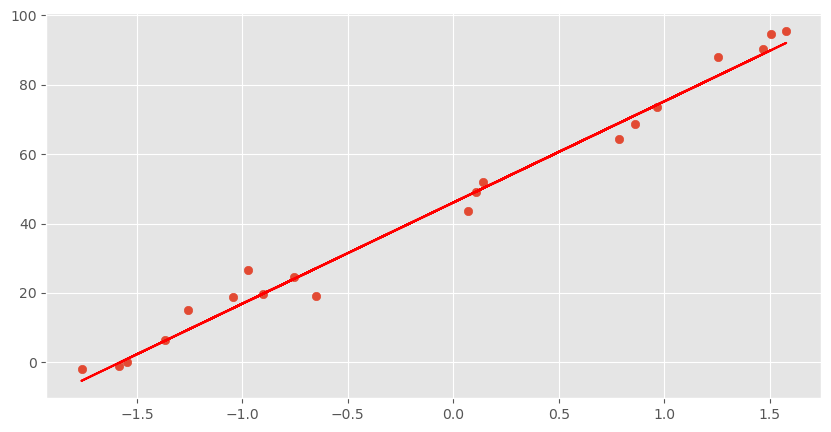

In [117]:
### Code here
plt.figure(figsize=(10,5))
plt.scatter(X_test[:, 1], y_test)
plt.plot(X_test[:, 1:], y_pred_l2, color='red')
plt.show()

**2.1.13 Train a linear regression model ($\alpha = 0$) on the car price training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [118]:
### Code here
from sklearn.metrics import r2_score
ridge_car_price = LinearRegression(alpha = 1e-13)
ridge_car_price.train(car_price_X_train, car_price_y_train)
pred_X_train = ridge_car_price.predict(car_price_X_train)
pred_X_val = ridge_car_price.predict(car_price_X_val)
pred_X_test = ridge_car_price.predict(car_price_X_test)
r2_train = r2_score(car_price_y_train, pred_X_train)
r2_val = r2_score(car_price_y_val, pred_X_val)
r2_test = r2_score(car_price_y_test, pred_X_test)
print(r2_train, r2_val, r2_test)

0.8638854740012187 0.8152101450283361 0.8153136829713807


In [119]:
print(pred_X_test[0:3])
print(pred_X_test[-3:])
print(car_price_y_test[0:3])
print(car_price_y_test[-3:])

[ 5860.20517978 20152.76559615 15615.80119842]
[ 6266.14511574 37952.24453421  5423.62866863]
52      6795.0
181    15750.0
5      15250.0
Name: price, dtype: float64
22     6377.0
74    45400.0
44     8916.5
Name: price, dtype: float64


Predictions---

First 3: 5860.20517978, 20152.76559615, 15615.80119842

Last 3: 6266.14511574, 37952.24453421, 5423.62866863

Actual Values---

First 3: 6795.0, 15750.0, 15250.0 

Last 3: 6377.0, 45400.0, 8916.5

**2.1.14 As a baseline model, use the mean of the training labels (car_price_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [120]:
### Code here
mean = sum(car_price_y_train)/len(car_price_y_train)
mean_train = [mean] * len(car_price_y_train)
mean_val = [mean] * len(car_price_y_val)
mean_test = [mean] * len(car_price_y_test)
r2_mean_train = r2_score(car_price_y_train, mean_train)
r2_mean_val = r2_score(car_price_y_val, mean_val)
r2_mean_test = r2_score(car_price_y_test, mean_test)
print(r2_mean_train, r2_mean_val, r2_mean_test)

0.0 -0.04252409813108615 -0.0028042246944892657


**2.1.15 Interpret your model trained on the car price dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

In [121]:
### Code here
num_df.dtypes

symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

['Bias Term', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


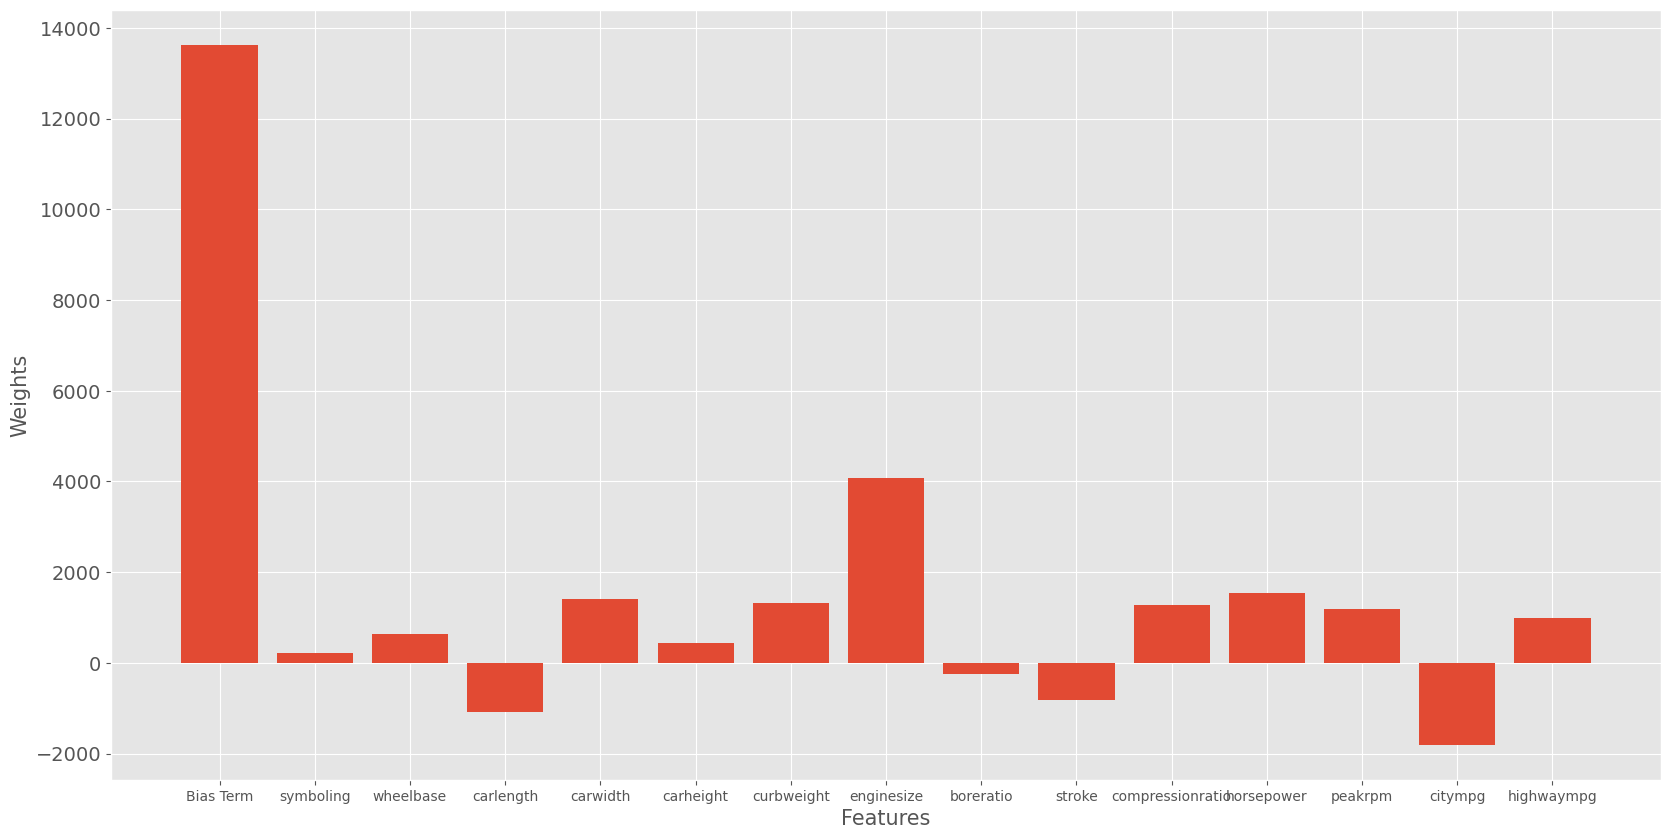

In [124]:
w_list = list(num_df.columns)
w_list.insert(0, 'Bias Term')
print(w_list)
plt.figure(figsize=(20,10))
plt.bar(w_list, ridge_car_price.w)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Weights', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)
plt.show()

**2.1.16 According to your model, which features are the greatest contributors to the car price?**

#### Comment here
The boreratio, peakrpm, and enginesize are the top 3 greatest contributors to the car price.

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the car price dataset.

**2.1.17 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

In [125]:
### Code here
alphas = np.logspace(-5, 1, 20)
r2s_train = []
r2s_val = []
for i in alphas:
    rr_tune = LinearRegression(i)
    rr_tune.train(car_price_X_train, car_price_y_train)
    pred_X_train = rr_tune.predict(car_price_X_train)
    pred_X_val = rr_tune.predict(car_price_X_val)
    r2s_train.append(r2_score(car_price_y_train, pred_X_train))
    r2s_val.append(r2_score(car_price_y_val, pred_X_val))

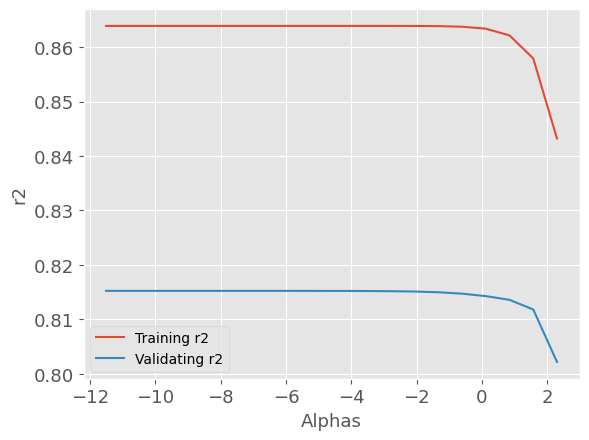

In [126]:
alphas = np.log(alphas)
plt.figure()
plt.plot(alphas, r2s_train, label='Training r2')
plt.plot(alphas, r2s_val, label='Validating r2')
plt.xlabel('Alphas', fontsize=13)
plt.ylabel('r2', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()

**2.1.18 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

#### Comment here
Initially, the training set has a slightly better r2 score than the validation set, which is expected as the model is overfitting the training data. However, both sets have a steep decrease in the r2 score around an alpha value of 0.5. This drop in r2 score indicates that the model is becoming too simple and is underfitting the data.

While the training set has a gradual decrease and starts to have a steep decrease around 0.8, the validation set has a very brief increase in r2 score around 0.4, followed by a sharp decrease around 0.5. This suggests that the model is overfitting the validation set briefly before underfitting again. The best model complexity in this case would be around the alpha value of 0.4 where the validation set has the highest r2 score.

### 2.2 Logistic Regression

In this part, we will be using a heart disease dataset for classification. 

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides information about patients, over 4,000 records and 15 attributes.


**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target):
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [127]:
heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Missing Value Analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)**

In [128]:
### Code here
print(heart_disease_df.shape)
null_vals = heart_disease_df.isnull().values.any()
print(null_vals)
print(heart_disease_df.isnull().sum())

(4238, 16)
True
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [129]:
#### Comment here
nulls_df = heart_disease_df[heart_disease_df.isnull().any(axis=1)]
heart_disease_df['education'].describe()

count    4133.000000
mean        1.978950
std         1.019791
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [130]:
nulls_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


In [131]:
heart_disease_df.dropna(inplace=True)
print(heart_disease_df.isnull().values.any())

False


I think they should all be removed because one empty input feature might be able to corrupt the data analysis procedure. For example, even though 'education' seems to be irrelevant in impacting the target label, it is not safe to use it as the feature might have an impact. Also 'glucose' should also be removed as filling with a mean value will might corrupt the result. 

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.**

In [132]:
### Code here
print(heart_disease_df['diabetes'].value_counts())

0    3557
1      99
Name: diabetes, dtype: int64


#### Comment here
The label distribution is imbalanced. For example, in the "diabetes" column, the data is skewed towards people without diabetes, as the number of people without diabetes (3557) is significantly higher than the number of people with diabetes (99), resulting in an uneven distribution.

**2.2.3 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

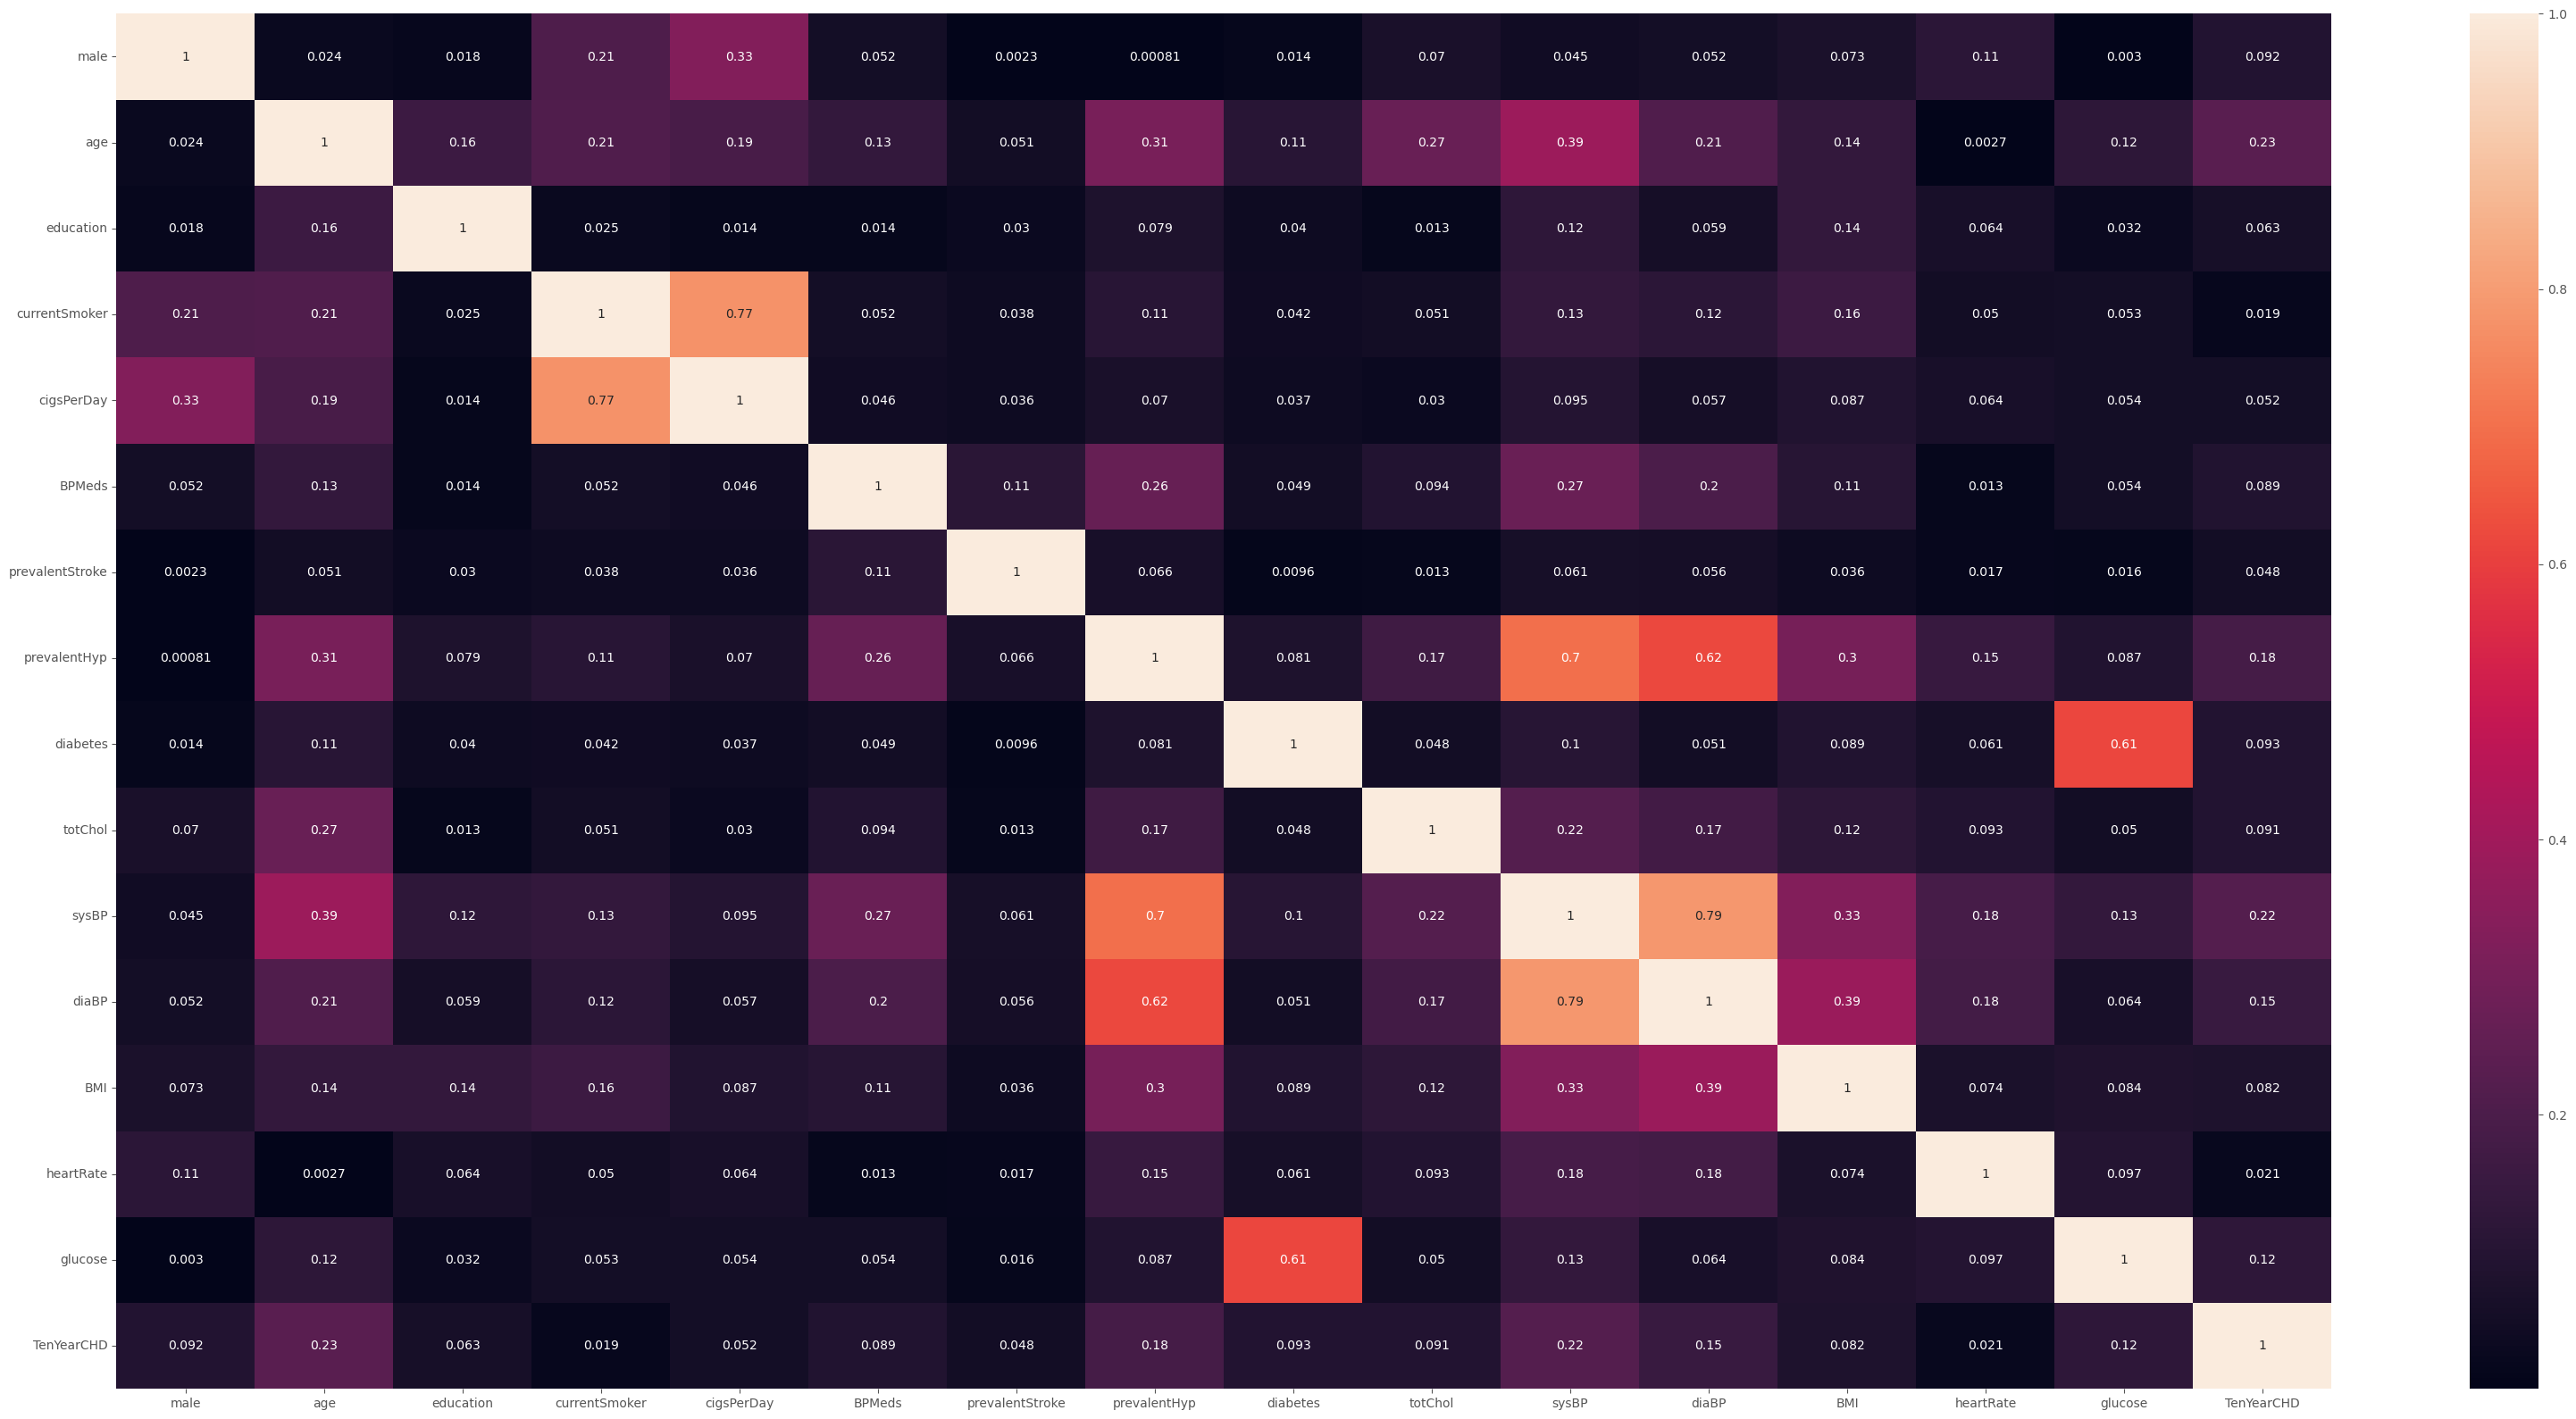

In [133]:
### Code here
corr_matrix = heart_disease_df.corr().abs()
plt.figure(figsize=(40,20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Comment here
There is nothing to drop as none of the numbers exceed the threshold.

**2.2.4 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [134]:
### Code here
new_df = heart_disease_df.drop(columns=['TenYearCHD'])
target = heart_disease_df['TenYearCHD']
# Convert the label from a Pandas series to a Numpy vector
label = np.array(target).reshape(-1,1)
# Split the dataset into training(60%), validation(20%), test(20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(new_df, label, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)
# Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
# Add a column of ones to the feature matrices of train, validation and test dataset
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5])

[[ 1.          1.10947093  1.4718344  -0.96232538 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.60079213  0.12520652
  -0.24664238  0.51694627 -2.15100438 -0.07698024]
 [ 1.         -0.90133051 -1.12062745  0.00308155  1.04334626  0.10455836
  -0.17752347 -0.07722242 -0.66825887 -0.16627571 -0.49865133 -0.89891325
  -0.54085384  0.33957544 -0.07171784 -0.20135476]
 [ 1.         -0.90133051 -0.76710993  0.00308155 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.62322976 -0.05685922
  -0.16258197 -0.44627585  2.00756869  0.50343415]
 [ 1.          1.10947093 -0.64927075  0.96848849  1.04334626  1.20898754
  -0.17752347 -0.07722242 -0.66825887 -0.16627571  0.75785549 -0.78512217
  -0.58288404 -0.41425056  0.34413946 -0.20135476]
 [ 1.         -0.90133051 -1.59198415  0.00308155 -0.95845457 -0.74500255
  -0.17752347 -0.07722242 -0.66825887 -0.16627571 -0.65571468 -1.14925364
  -0.79303508 -1.04736587 -0.07171784 -0.36718744]]


### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [135]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.5 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

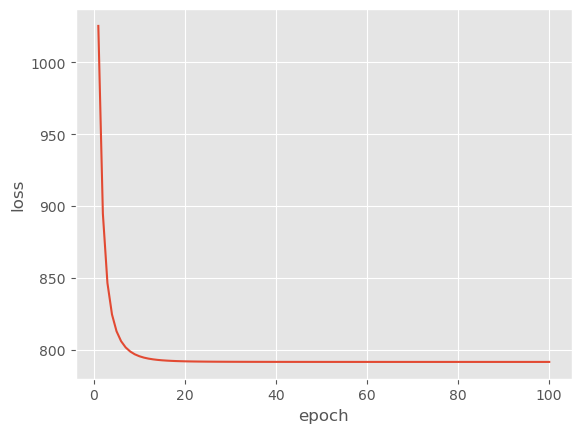

In [136]:
### Code here
logreg = LogisticRegression()
loss = logreg.train(X_train, y_train)
loss_list = []
for i in range(len(loss)):
    for l in loss[i][0]:
        loss_list.append(l)
epoch = [i for i in range(1, 101)]
plt.plot(epoch, loss_list)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [137]:
alphas = [np.random.rand() for i in range(20)]
etas = [np.random.rand()*0.001 for i in range(20)]
ts = np.random.randint(0,100,20)

models = []
losses = []
l_list = []

for i in range(20):
    m = LogisticRegression(alphas[i], ts[i], etas[i])
    l = m.train(X_train, y_train)
    for i in range(len(l)):
        for j in l[i][0]:
            l_list.append(j)
    min_l = min(l_list)
    models.append(m)
    losses.append(min_l)
    
minimum_loss = min(losses)
ind = losses.index(minimum_loss)
mod = models[ind]
print(minimum_loss, mod.alpha, mod.t, mod.eta)

792.8794357861028 0.29007760721044407 71 0.0009988470065678664


In [138]:
from sklearn.metrics import accuracy_score

In [139]:
pred_X_test = logreg.predict(X_test)
pred_X_test_models = mod.predict(X_test)
accuracy_first = accuracy_score(y_test, pred_X_test)
accuracy_second = accuracy_score(y_test, pred_X_test_models)
print(accuracy_first)
print(accuracy_second)

0.8538251366120219
0.8538251366120219


**2.2.6 Do you think the model is performing well keeping the class distribution in mind?**

#### Comment here
The original model already captures the hyperparameters with the minimum loss, concluding from the same accuracy score.

> We will look into different evaluation metrics in Lecture 5 that will help us with such imbalanced datasets. 

### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

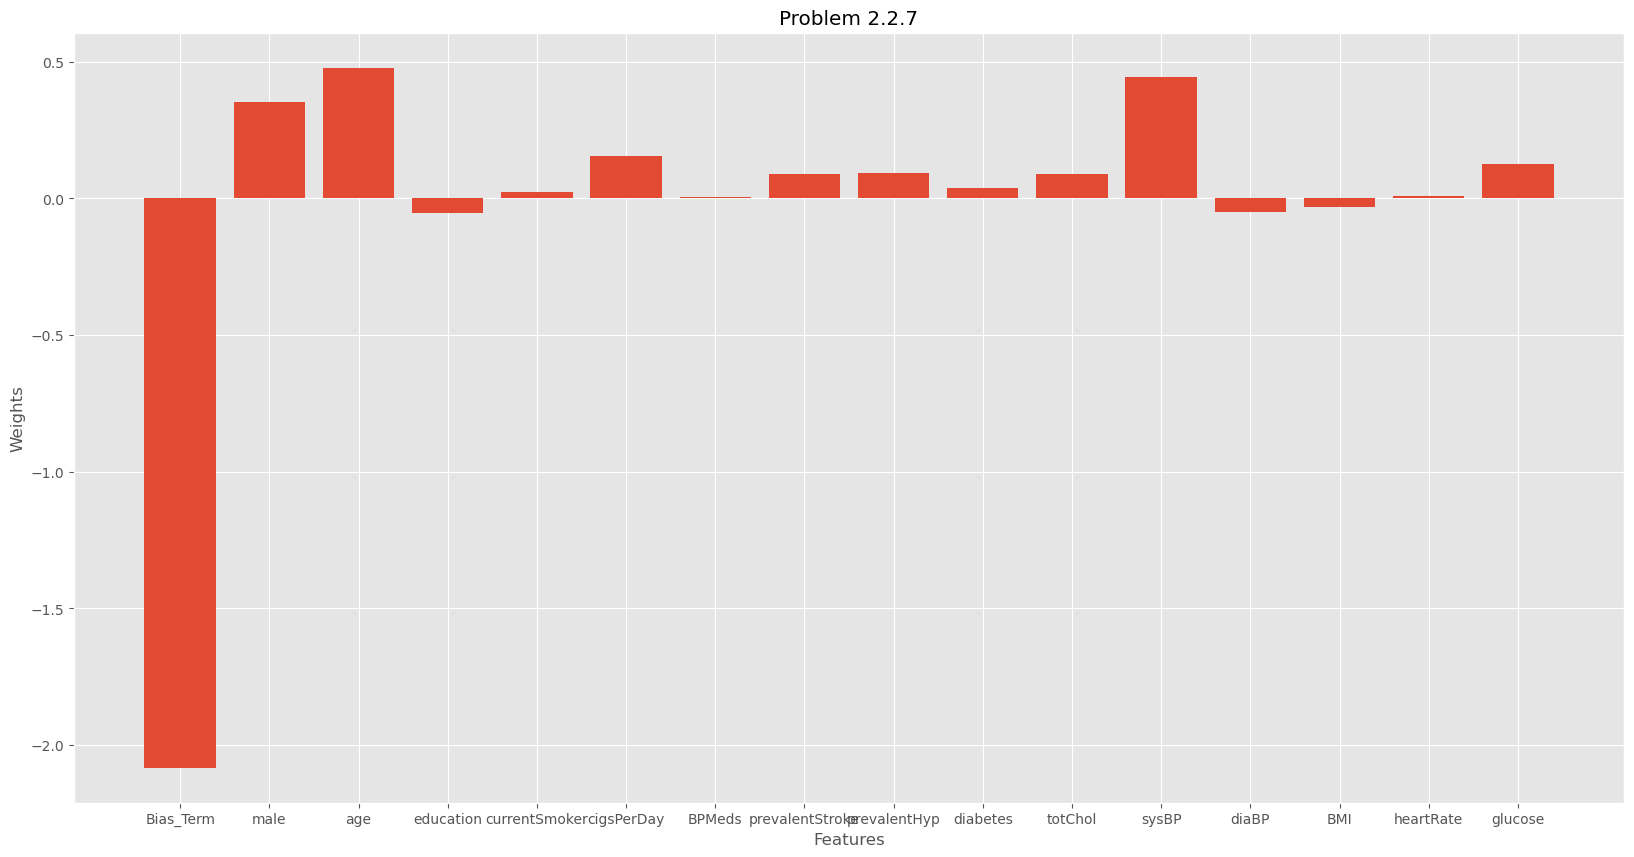

In [140]:
### Code here
#print(list(new_df.columns))
weights = [weights for i in range(len(logreg.w)) for weights in logreg.w[i]]
weights_list = ['Bias_Term', 'male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
plt.figure(figsize=(20,10))
plt.bar(weights_list, weights)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Problem 2.2.7')
plt.show()

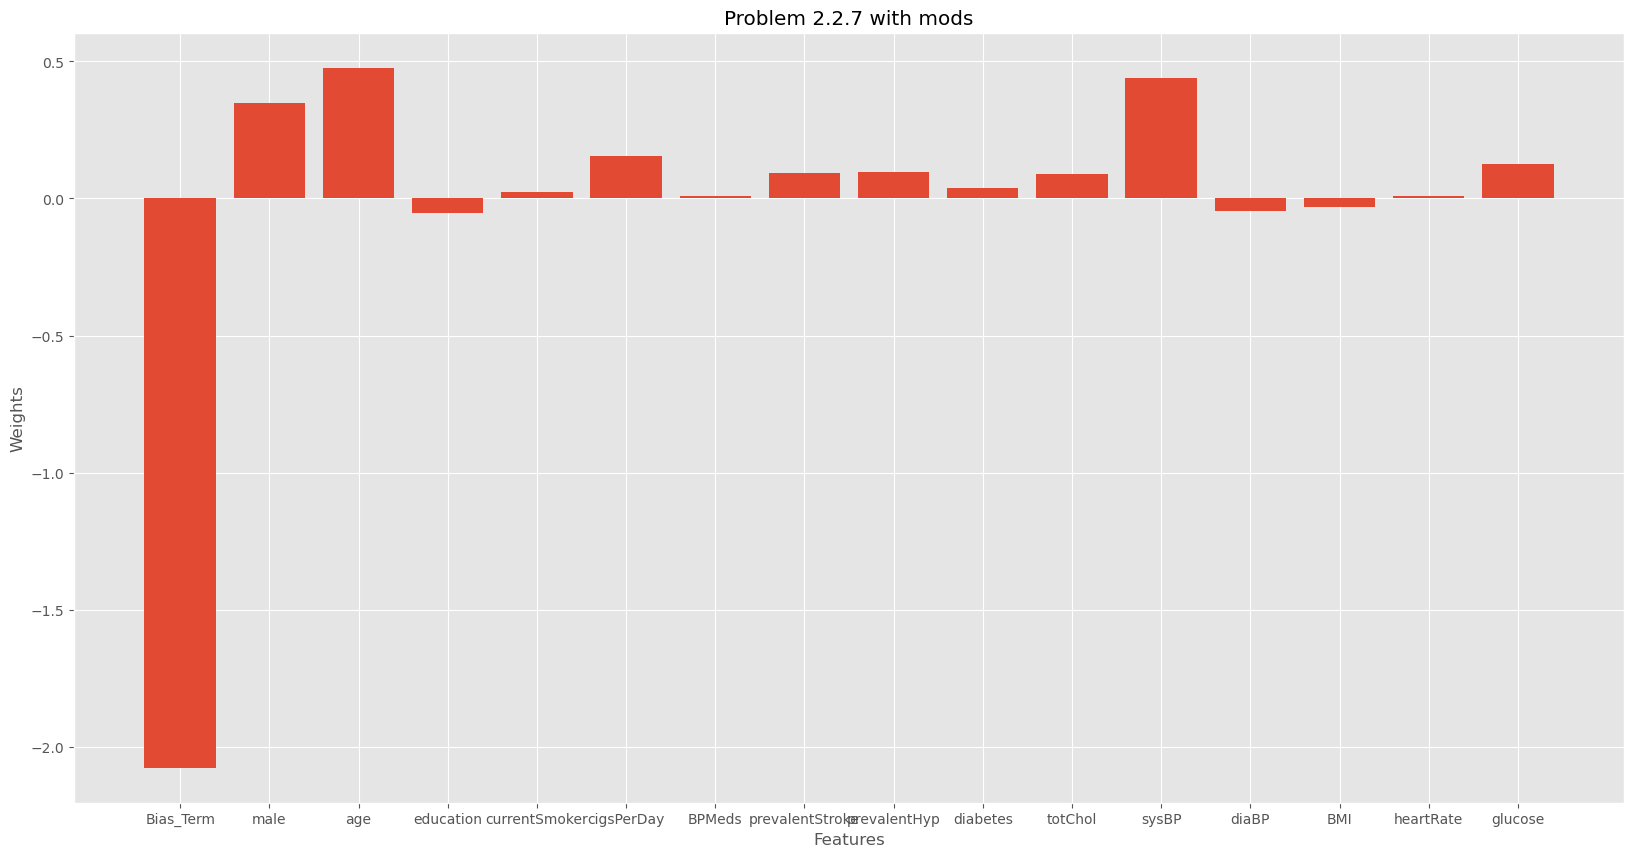

In [141]:
mod_weights = [weights for i in range(len(mod.w)) for weights in mod.w[i]]
mod_weights_list = ['Bias_Term', 'male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
plt.figure(figsize=(20,10))
plt.bar(mod_weights_list, mod_weights)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Problem 2.2.7 with mods')
plt.show()

#### Comment here
Although the second option had the minimum loss, both options produced the same result. This is because I successfully preprocessed the data by removing all null values, which resulted in the most optimal outcome.


# **Part 3: Support Vector Machines**

In this part, we will be using support vector machines for classification on the heart disease dataset.

### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [144]:
### Code here
primal_svm = LinearSVC()
primal_svm.fit(X_train, y_train.ravel())
pred_train = primal_svm.predict(X_train)
pred_val = primal_svm.predict(X_val)
pred_test = primal_svm.predict(X_test)
train_accuracy = accuracy_score(y_train, pred_train)
val_accuracy = accuracy_score(y_val, pred_val)
test_accuracy = accuracy_score(y_test, pred_test)
print(train_accuracy, val_accuracy, test_accuracy)


0.8613771089831281 0.8194254445964432 0.8524590163934426


/Users/jasonjin/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [145]:
### Code here
dual_svm = SVC()
dual_svm.fit(X_train, y_train.ravel())
pred_train = dual_svm.predict(X_train)
pred_val = dual_svm.predict(X_val)
pred_test = dual_svm.predict(X_test)
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_val = accuracy_score(y_val, pred_val)
accuracy_test = accuracy_score(y_test, pred_test)
print(accuracy_train, accuracy_val, accuracy_test)

0.8682170542635659 0.8166894664842681 0.8497267759562842
